In [4]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

from sklearn.linear_model import LogisticRegression

from sklearn.datasets import load_iris

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.inspection import DecisionBoundaryDisplay


# Read the CSV file, skipping lines with errors
df = pd.read_csv('StudentAnswer.csv',delimiter=';')
df.dropna()

,Timestamp,Q1,Q2,Q3,Q4,Q5.1,Q5.2,Q5.3,Q5.4,Q5.5,...,Q8.2,Q8.3,Q8.4,Q8.5,Q9.1,Q9.2,Q9.3,Q9.4,Q9.5,"Q10,,,,,"
0,5.14.2023 21:22:19,2.0,International Economic Relations,1.0,4.0,4.0,4.0,5.0,5.0,4.0,...,5.0,5.0,4.0,5.0,4.0,5.0,5.0,4.0,4.0,",,,,,"
1,5.15.2023 8:45:52,1.0,International Economic Relations,1.0,3.0,2.0,4.0,2.0,1.0,3.0,...,4.0,4.0,2.0,3.0,3.0,4.0,3.0,2.0,2.0,",,,,,"
2,5.15.2023 9:54:15,1.0,International Economic Relations,1.0,2.0,3.0,3.0,3.0,2.0,3.0,...,4.0,4.0,3.0,3.0,3.0,3.0,2.0,2.0,3.0,",,,,,"
3,5.15.2023 15:17:41,1.0,International Economic Relations,1.0,2.0,4.0,4.0,4.0,2.0,4.0,...,4.0,4.0,4.0,4.0,4.0,4.0,3.0,4.0,4.0,",,,,,"
4,5.15.2023 15:19:02,1.0,International Economic Relations,1.0,3.0,4.0,4.0,3.0,2.0,4.0,...,4.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,",,,,,"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,5.26.2023 15:44:55,1.0,International Economic Relations,1.0,4.0,4.0,3.0,4.0,4.0,4.0,...,4.0,4.0,2.0,3.0,3.0,4.0,3.0,4.0,4.0,ChtGPT helps me a lot in preparing for assignm...
99,5.26.2023 21:43:23,1.0,Finance,1.0,1.0,3.0,3.0,2.0,2.0,3.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,",,,,,"
100,5.27.2023 10:28:36,1.0,Marketing,1.0,5.0,4.0,4.0,3.0,3.0,3.0,...,5.0,5.0,4.0,4.0,2.0,4.0,3.0,4.0,4.0,",,,,,"
101,5.28.2023 0:51:54,1.0,Public Administration,2.0,4.0,4.0,4.0,4.0,4.0,3.0,...,4.0,4.0,4.0,4.0,2.0,3.0,3.0,3.0,3.0,",,,,,"


In [5]:
print(df.head())

            Timestamp   Q1                                 Q2   Q3   Q4  Q5.1  \
0  5.14.2023 21:22:19  2.0   International Economic Relations  1.0  4.0   4.0   
1   5.15.2023 8:45:52  1.0  International Economic Relations   1.0  3.0   2.0   
2   5.15.2023 9:54:15  1.0   International Economic Relations  1.0  2.0   3.0   
3  5.15.2023 15:17:41  1.0   International Economic Relations  1.0  2.0   4.0   
4  5.15.2023 15:19:02  1.0   International Economic Relations  1.0  3.0   4.0   

   Q5.2  Q5.3  Q5.4  Q5.5  ...  Q8.2  Q8.3  Q8.4  Q8.5  Q9.1  Q9.2  Q9.3  \
0   4.0   5.0   5.0   4.0  ...   5.0   5.0   4.0   5.0   4.0   5.0   5.0   
1   4.0   2.0   1.0   3.0  ...   4.0   4.0   2.0   3.0   3.0   4.0   3.0   
2   3.0   3.0   2.0   3.0  ...   4.0   4.0   3.0   3.0   3.0   3.0   2.0   
3   4.0   4.0   2.0   4.0  ...   4.0   4.0   4.0   4.0   4.0   4.0   3.0   
4   4.0   3.0   2.0   4.0  ...   4.0   4.0   3.0   3.0   3.0   3.0   3.0   

   Q9.4  Q9.5  Q10,,,,,  
0   4.0   4.0     ,,,,,  
1   

In [6]:
frequency = df['Q1'].value_counts()
print(frequency)

Q1
1.0    100
2.0      2
Name: count, dtype: int64


In [7]:
categories = df['Q2'].unique()
print(categories)
frequency = df['Q2'].value_counts()
print(frequency)

['International Economic Relations' 'International Economic Relations '
 'Economics' 'Marketing' 'Marketing ' 'Accounting' 'Accounting ' 'Finance'
 nan 'Economics and Business' '体龛滏禚眚 磬 蝮痂耱梓羼觇 徼珥羼' 'Business Management'
 'Public Administration ' 'Public Administration' 'Finance ']
Q2
Marketing                            26
Finance                              21
Accounting                           17
International Economic Relations     12
Accounting                            9
Economics and Business                5
Marketing                             3
Economics                             2
Public Administration                 2
International Economic Relations      1
体龛滏禚眚 磬 蝮痂耱梓羼觇 徼珥羼                    1
Business Management                   1
Public Administration                 1
Finance                               1
Name: count, dtype: int64


In [46]:
category_to_delete = '体龛滏禚眚 磬 蝮痂耱梓羼觇 徼珥羼'

# Filter out rows containing the category to delete
df = df[df['Q2'] != category_to_delete]

In [48]:
categories = df['Q2'].unique()
print(categories)
frequency = df['Q2'].value_counts()
print(frequency)

[1 0 2]
Q2
2    48
0    38
1    15
Name: count, dtype: int64


In [50]:
from sklearn.preprocessing import LabelEncoder

#df['Q2'] = label_encoder.fit_transform(df['Q2'])
df.dropna(subset=['Q2'], inplace=True)
categories = df['Q2'].unique()
print(categories)

[1 0 2]


In [11]:
#create three target categories
category_mapping = {
    'International Economic Relations': 'Economics',  #Economics
    'International Economic Relations ': 'Economics',  #Economics
    'Economics': 'Economics',  #Economics
    'Marketing': 'Business',  #Business
    'Marketing ': 'Business',  #Business
    'Public Administration': 'Business',  #Business
    'Public Administration ': 'Business',  #Business
    'Business Management': 'Business',  #Business
    'Economics and Business': 'Business',  #Business
    'Accounting': 'Finance & Accounting',  #Finance & Accounting
    'Accounting ': 'Finance & Accounting',  #Finance & Accounting
    'Finance': 'Finance & Accounting',  #Finance & Accounting
    'Finance ': 'Finance & Accounting',  #Finance & Accounting
}
df['Q2'] = df['Q2'].map(category_mapping)
print(df['Q2'])
unique_categories = df['Q2'].unique()
print(unique_categories)

0                 Economics
1                 Economics
2                 Economics
3                 Economics
4                 Economics
               ...         
98                Economics
99     Finance & Accounting
100                Business
101                Business
102    Finance & Accounting
Name: Q2, Length: 101, dtype: object
['Economics' 'Business' 'Finance & Accounting']


In [12]:

unique_categories = df['Q4'].unique()
print(unique_categories)
df.dropna(subset=['Q4'], inplace=True)
unique_categories = df['Q4'].unique()
print(unique_categories)
print(df['Q4'])


[4. 3. 2. 5. 1.]
[4. 3. 2. 5. 1.]
0      4.0
1      3.0
2      2.0
3      2.0
4      3.0
      ... 
98     4.0
99     1.0
100    5.0
101    4.0
102    2.0
Name: Q4, Length: 101, dtype: float64


In [13]:
category_mapping = {
    5: 3,  #rarely
    4: 3,  #rarely
    3: 2,  #sometimes
    2: 1,  #often
    1: 1   #often 
}
df['combined_Q4'] = df['Q4'].map(category_mapping)
print(df['combined_Q4'])
unique_categories = df['combined_Q4'].unique()
print(unique_categories)

0      3
1      2
2      1
3      1
4      2
      ..
98     3
99     1
100    3
101    3
102    1
Name: combined_Q4, Length: 101, dtype: int64
[3 2 1]


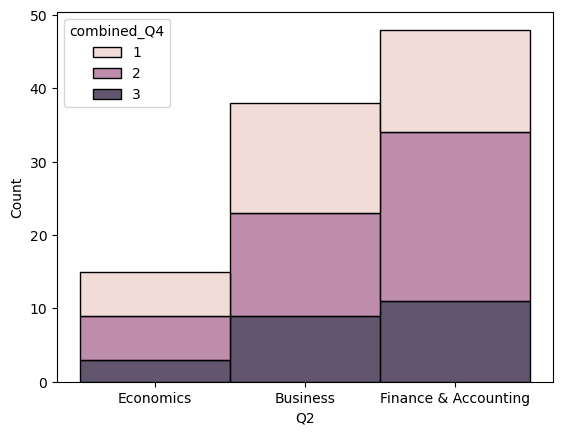

In [14]:
sns.histplot(df, x='Q2', hue='combined_Q4', multiple='stack')
plt.show()

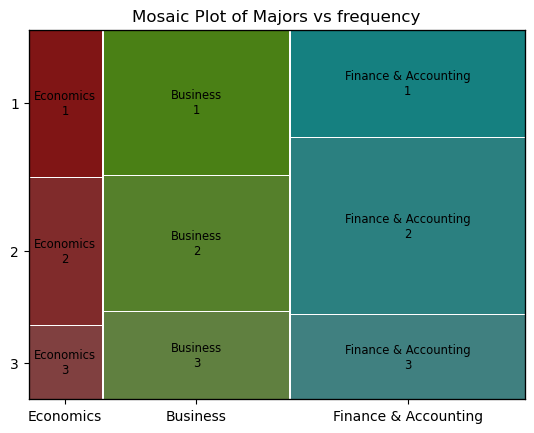

In [15]:
from statsmodels.graphics.mosaicplot import mosaic

# Create a mosaic plot
mosaic(df, ['Q2', 'combined_Q4'], title='Mosaic Plot of Majors vs frequency')
plt.show()

In [16]:
#transfer Q2's categorical data into numerical
label_encoder = LabelEncoder()
df['Q2'] = label_encoder.fit_transform(df['Q2'])
print(df['Q2'])
unique_categories = df['Q2'].unique()
print(unique_categories)

0      1
1      1
2      1
3      1
4      1
      ..
98     1
99     2
100    0
101    0
102    2
Name: Q2, Length: 101, dtype: int64
[1 0 2]


In [17]:
#Q6 and Q8

df['mean_Q6'] = df[['Q6.1', 'Q6.2', 'Q6.3','Q6.4','Q6.5','Q6.7','Q6.8']].mean(axis=1)
df['mean_Q8'] = df[['Q8.1', 'Q8.2', 'Q8.3','Q8.4','Q8.5']].mean(axis=1)
print(df['mean_Q8'])
unique_categories = df['mean_Q8'].unique()
print(unique_categories)

0      4.6
1      3.4
2      3.6
3      4.0
4      3.4
      ... 
98     3.4
99     4.0
100    4.6
101    4.2
102    3.0
Name: mean_Q8, Length: 101, dtype: float64
[4.6 3.4 3.6 4.  3.  3.8 2.6 3.2 4.2 2.4 4.8 1.4 4.4 2.2 5.  2.8]


In [18]:
X = df[['Q1', 'Q2','mean_Q6', 'mean_Q8']]
y = df['combined_Q4']
print(X)
print(y)

      Q1  Q2   mean_Q6  mean_Q8
0    2.0   1  4.000000      4.6
1    1.0   1  4.428571      3.4
2    1.0   1  3.428571      3.6
3    1.0   1  4.142857      4.0
4    1.0   1  3.857143      3.4
..   ...  ..       ...      ...
98   1.0   1  3.714286      3.4
99   1.0   2  4.000000      4.0
100  1.0   0  4.857143      4.6
101  1.0   0  4.285714      4.2
102  1.0   2  3.000000      3.0

[101 rows x 4 columns]
0      3
1      2
2      1
3      1
4      2
      ..
98     3
99     1
100    3
101    3
102    1
Name: combined_Q4, Length: 101, dtype: int64


In [19]:
# Train Test split 
X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                     train_size = 0.7, 
                                     test_size = 0.3, 
                                     random_state = 42)

In [20]:
# Step 3: Instantiate the logistic regression model
logistic_regression = LogisticRegression()

In [29]:
logistic_regression.fit(X_train, y_train)

LogisticRegression()

In [32]:
y_pred = logistic_regression.predict(X_train)
y_pred1 = logistic_regression.predict(X_test)

print("Classification report for the test set")
print(classification_report(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print("Classification report for the training set")
print(classification_report(y_train, y_pred))
print(confusion_matrix(y_train, y_pred))

Classification report for the test set
              precision    recall  f1-score   support

           1       0.44      0.36      0.40        11
           2       0.44      0.57      0.50        14
           3       0.25      0.17      0.20         6

    accuracy                           0.42        31
   macro avg       0.38      0.37      0.37        31
weighted avg       0.41      0.42      0.41        31

[[4 7 0]
 [3 8 3]
 [2 3 1]]
Classification report for the training set
              precision    recall  f1-score   support

           1       0.53      0.33      0.41        24
           2       0.48      0.76      0.59        29
           3       0.56      0.29      0.38        17

    accuracy                           0.50        70
   macro avg       0.52      0.46      0.46        70
weighted avg       0.52      0.50      0.48        70

[[ 8 14  2]
 [ 5 22  2]
 [ 2 10  5]]


In [ ]:
# Plot the decision boundary
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = np.c_[xx.ravel(), yy.ravel()]
Z_original_space = pca.inverse_transform(Z)
Z_predictions = logistic_regression.predict(Z_original_space)
Z_predictions = Z_predictions.reshape(xx.shape)

plt.contourf(xx, yy, Z_predictions, alpha=0.8, cmap=plt.cm.coolwarm)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolors='k')
plt.title("Logistic Regression Model of Frequency")
plt.show()

In [56]:
# print the coefficients for each feature
coefficients = logistic_regression.coef_[0]  
intercept = logistic_regression.intercept_[0]

print("Coefficients:")
for i, coef in enumerate(coefficients):
    print(f"Feature {i}: {coef}")

print("Intercept:", intercept)

Coefficients:
Feature 0: 0.5995589674420624
Feature 1: -0.05281784494617617
Feature 2: -0.5797751917048221
Feature 3: -0.38980425737296126
Intercept: 3.348422285389861


In [61]:
#try using GridSearchCV to improve the model
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, accuracy_score
param_grid = {
    'C': [0.01, 0.1, 10, 20], 
    'penalty': ['l2'],  
    'solver': ['lbfgs'],  
    'max_iter': [200, 500,800],
}

# Initialize GridSearchCV with cross-validation
grid_search = GridSearchCV(
    LogisticRegression(),
    param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='accuracy', # Use accuracy as the scoring metric
    n_jobs=-1  # Use all available cores
)

grid_search.fit(X_train, y_train)
print("Best Hyperparameters:", grid_search.best_params_)

# Evaluate the best model on the test set
best_params = grid_search.best_params_
best_model = LogisticRegression(**best_params)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))

Best Hyperparameters: {'C': 10, 'max_iter': 200, 'penalty': 'l2', 'solver': 'lbfgs'}
Classification Report:
               precision    recall  f1-score   support

           1       0.38      0.27      0.32        11
           2       0.42      0.57      0.48        14
           3       0.25      0.17      0.20         6

    accuracy                           0.39        31
   macro avg       0.35      0.34      0.33        31
weighted avg       0.37      0.39      0.37        31



Accuracy with Best Hyperparameters: 0.3870967741935484
Classification Report:
               precision    recall  f1-score   support

           1       0.38      0.27      0.32        11
           2       0.42      0.57      0.48        14
           3       0.25      0.17      0.20         6

    accuracy                           0.39        31
   macro avg       0.35      0.34      0.33        31
weighted avg       0.37      0.39      0.37        31



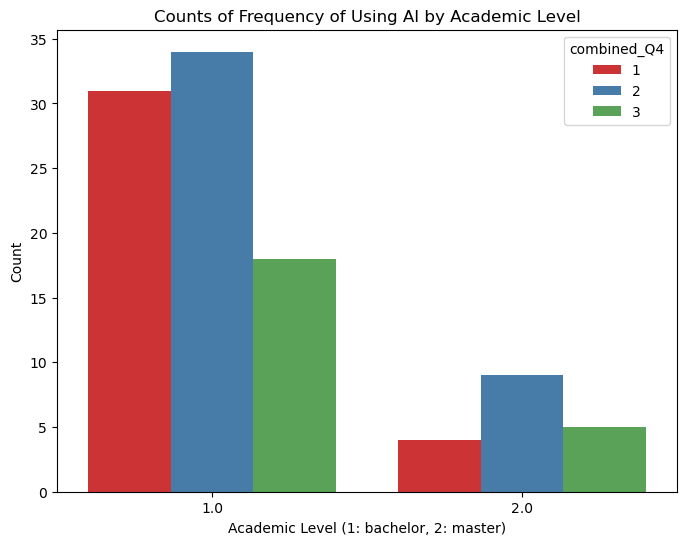

In [38]:
# Bar plot showing counts for each combination of frequency and gender
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Q3', hue='combined_Q4', palette='Set1')

plt.title("Counts of Frequency of Using AI by Academic Level")
plt.xlabel("Academic Level (1: bachelor, 2: master)")
plt.ylabel("Count")
plt.show()

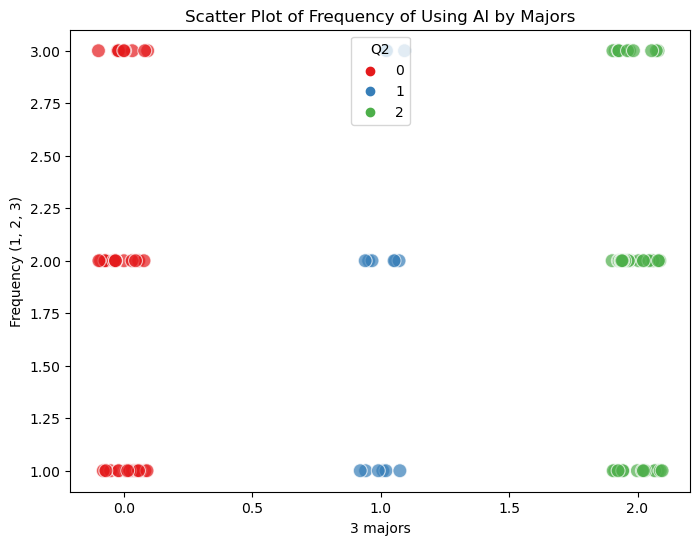

In [615]:
# Create a scatter plot with jittering
plt.figure(figsize=(8, 6))

# Add jitter to the x-axis to avoid overlapping points
jitter = np.random.uniform(-0.1, 0.1, size=len(df['Q2']))
sns.scatterplot(
    x=df['Q2'] + jitter,  # Add jitter to the x-axis
    y=df['combined_Q4'],  # Y-axis is the frequency of using AI
    hue=df['Q2'],  # Color by gender
    palette='Set1',  # Use a color palette for distinction
    s=100,  # Size of the points
    alpha=0.7,  # Make the points slightly transparent
)

plt.title("Scatter Plot of Frequency of Using AI by Majors")
plt.xlabel("3 majors")
plt.ylabel("Frequency (1, 2, 3)")
plt.show()

In [611]:
gender_counts = filtered_df['Q2'].value_counts()
print(gender_counts)

Q2
9     26
5     21
0     17
7     12
1      9
4      5
10     3
3      2
11     2
8      1
13     1
2      1
12     1
6      1
Name: count, dtype: int64


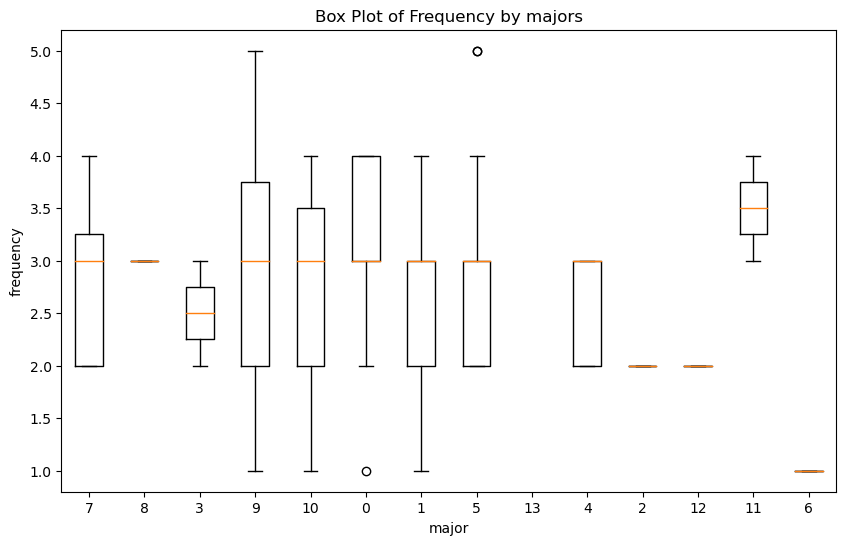

In [607]:
numerical_var = filtered_df['Q4']
categorical_var = filtered_df['Q2']

plt.figure(figsize=(10, 6))
plt.boxplot([numerical_var[categorical_var == category] for category in categorical_var.unique()],
            labels=categorical_var.unique())
plt.xlabel('major')
plt.ylabel('frequency')
plt.title('Box Plot of Frequency by majors')
plt.show()

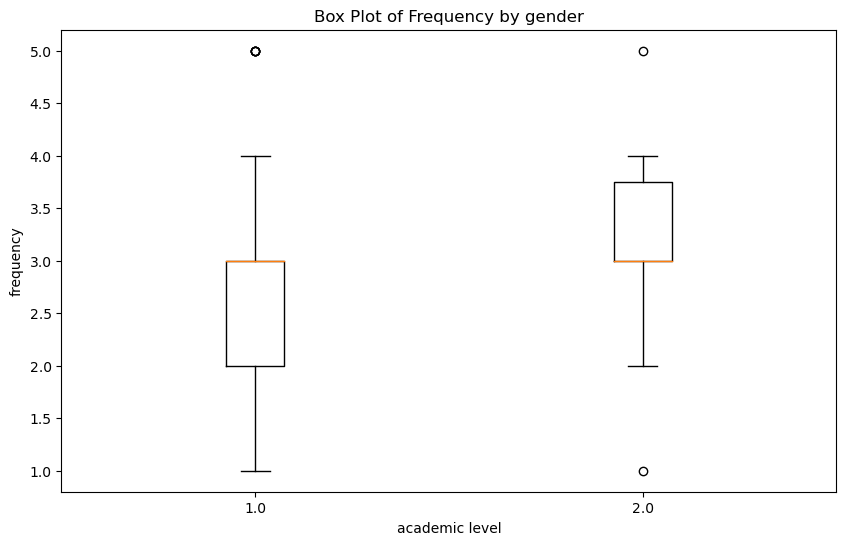

In [479]:
numerical_var = df['Q4']
categorical_var = df['Q3']

plt.figure(figsize=(10, 6))
plt.boxplot([numerical_var[categorical_var == category] for category in categorical_var.unique()],
            labels=categorical_var.unique())
plt.xlabel('academic level')
plt.ylabel('frequency')
plt.title('Box Plot of Frequency by gender')
plt.show()

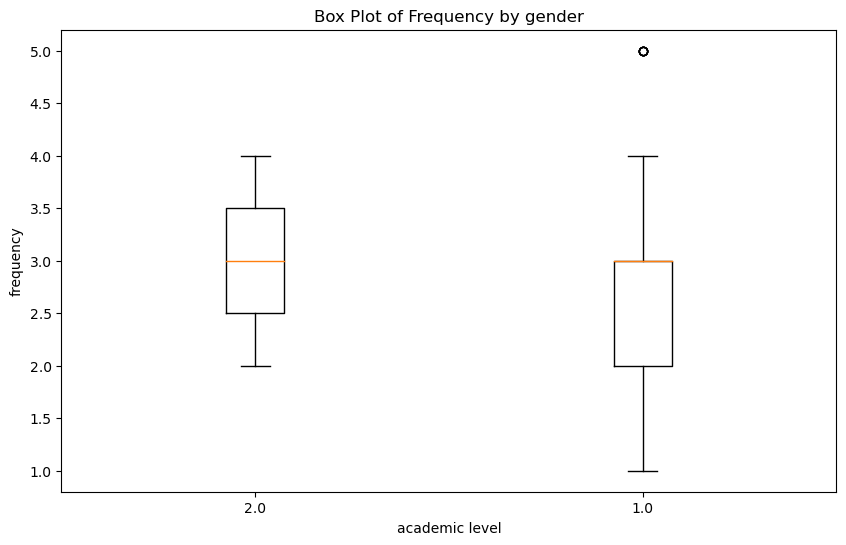

In [482]:
numerical_var = df['Q4']
categorical_var = df['Q1']

plt.figure(figsize=(10, 6))
plt.boxplot([numerical_var[categorical_var == category] for category in categorical_var.unique()],
            labels=categorical_var.unique())
plt.xlabel('academic level')
plt.ylabel('frequency')
plt.title('Box Plot of Frequency by gender')
plt.show()

In [484]:
# Coefficients (weights) associated with each feature
coefficients = logistic_regression.coef_

# Intercept term
intercept = logistic_regression.intercept_

print(coefficients)
print("Intercept:", intercept)

[[ 0.59955897 -0.05281784 -0.57977519 -0.38980426]
 [-0.29556576  0.0626156  -0.17606137 -0.14799119]
 [-0.3039932  -0.00979776  0.75583656  0.53779545]]
Intercept: [ 3.34842229  1.83035689 -5.17877918]
